Análise de Prevenção de Churn


In [1]:
import pandas as pd
df = pd.read_csv("/content/df_clean (1).csv")
df.head()

,Unnamed: 0,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


 Remoção de Colunas Irrelevantes

In [5]:
cols_to_drop = [c for c in ["customerID","Unnamed: 0"] if c in df.columns]
df_item1 = df.drop(columns=cols_to_drop, errors="ignore").copy()
df_item1.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,No,Female,False,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,No,Male,False,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,Yes,Male,False,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


Encoding (One-Hot Encoding)

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y = df_item1["Churn"].map({"Yes":1,"No":0})
X = df_item1.drop(columns=["Churn"])

categorical_cols = [c for c in X.columns if X[c].dtype=='object' or str(X[c].dtype)=='bool']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

ohe = OneHotEncoder(drop="first", handle_unknown="ignore")
preprocess_ohe = ColumnTransformer([("cat", ohe, categorical_cols),
                                    ("num","passthrough", numeric_cols)],
                                   remainder="drop")
X_encoded = preprocess_ohe.fit_transform(X)
feature_names = list(preprocess_ohe.named_transformers_["cat"].get_feature_names_out(categorical_cols)) + numeric_cols
X_enc_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)
X_enc_df.head()

,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,9.0,65.6,593.30,2.20
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40,2.01
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,4.0,73.9,280.85,2.34
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,13.0,98.0,1237.85,3.17
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,3.0,83.9,267.40,2.97


Proporção de Evasão (Churn)

In [10]:
churn_counts = y.value_counts().rename({0:"Ativos (No)",1:"Evadidos (Yes)"})
churn_rate = y.mean()*100
print(churn_counts.to_string())
print(f"Taxa de churn: {churn_rate:.2f}%")

Churn
Ativos (No)       5163
Evadidos (Yes)    1869
Taxa de churn: 26.58%


Balanceamento de Classes (SMOTE e UnderSampling)

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X_enc_df, y, test_size=0.2, random_state=42, stratify=y)
print('Antes do balanceamento (treino):\n', y_train.value_counts())

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print('\nApós SMOTE (treino):\n', y_train_sm.value_counts())

rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
print('\nApós UnderSampling (treino):\n', y_train_us.value_counts())

Antes do balanceamento (treino):
 Churn
0    4130
1    1495
Name: count, dtype: int64

Após SMOTE (treino):
 Churn
0    4130
1    4130
Name: count, dtype: int64

Após UnderSampling (treino):
 Churn
0    1495
1    1495
Name: count, dtype: int64


In [36]:

num_df = df_item1[numeric_cols].copy()
corr_matrix = num_df.corr()
corr_matrix.head()

,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
tenure,1.000000,0.246862,0.825880,0.246210
Charges.Monthly,0.246862,1.000000,0.651065,0.996227
Charges.Total,0.825880,0.651065,1.000000,0.650921
Contas_Diarias,0.246210,0.996227,0.650921,1.000000


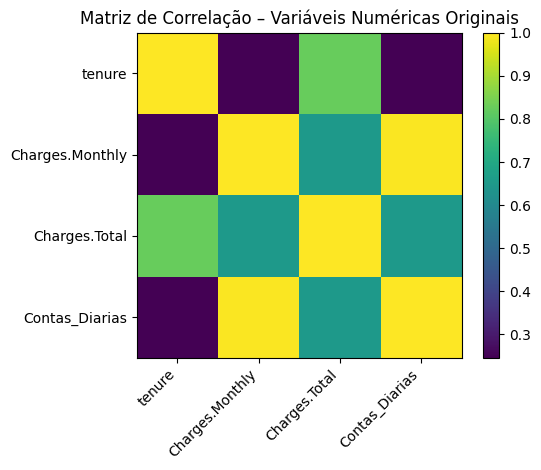

In [20]:
import matplotlib.pyplot as plt
plt.figure()
im = plt.imshow(corr_matrix, interpolation='nearest')
plt.title("Matriz de Correlação – Variáveis Numéricas Originais")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [34]:
ohe = OneHotEncoder(drop="first", handle_unknown="ignore")
preprocess_ohe = ColumnTransformer([("cat", ohe, categorical_cols),
                                    ("num","passthrough", numeric_cols)],
                                   remainder="drop")
X_encoded = preprocess_ohe.fit_transform(X)
feature_names = list(preprocess_ohe.named_transformers_["cat"].get_feature_names_out(categorical_cols)) + numeric_cols
X_enc_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)
corr_with_churn = X_enc_df.corrwith(y).sort_values(ascending=False)
corr_with_churn.head(20)

,0
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
Charges.Monthly,0.192858
Contas_Diarias,0.192030
PaperlessBilling_Yes,0.191454
SeniorCitizen_True,0.150541
StreamingTV_Yes,0.063254
StreamingMovies_Yes,0.060860
MultipleLines_Yes,0.040033
PhoneService_Yes,0.011691


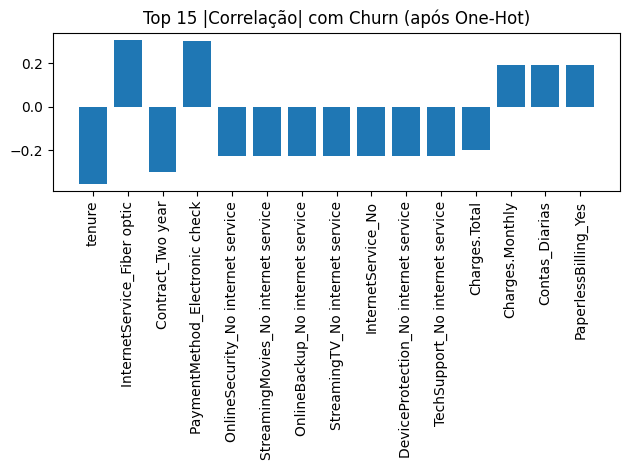

In [24]:
top_corr = corr_with_churn.to_frame(name="corr_com_churn")
top_corr["abs_corr"] = top_corr["corr_com_churn"].abs()
top_corr = top_corr.sort_values("abs_corr", ascending=False)
top15 = top_corr.head(15)["corr_com_churn"]
plt.figure()
plt.bar(range(len(top15.index)), top15.values)
plt.xticks(range(len(top15.index)), top15.index, rotation=90)
plt.title("Top 15 |Correlação| com Churn (após One-Hot)")
plt.tight_layout()
plt.show()

Análise direcionada

/tmp/ipython-input-1523851382.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_tenure, labels=["No (Ativos)", "Yes (Evadidos)"])


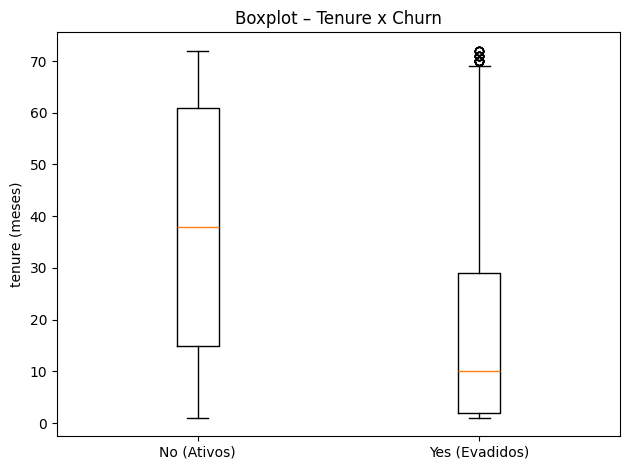

In [25]:
plt.figure()
data_tenure = [num_df.loc[y==0, "tenure"].dropna(), num_df.loc[y==1, "tenure"].dropna()]
plt.boxplot(data_tenure, labels=["No (Ativos)", "Yes (Evadidos)"])
plt.title("Boxplot – Tenure x Churn")
plt.ylabel("tenure (meses)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-387619549.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_total, labels=["No (Ativos)", "Yes (Evadidos)"])


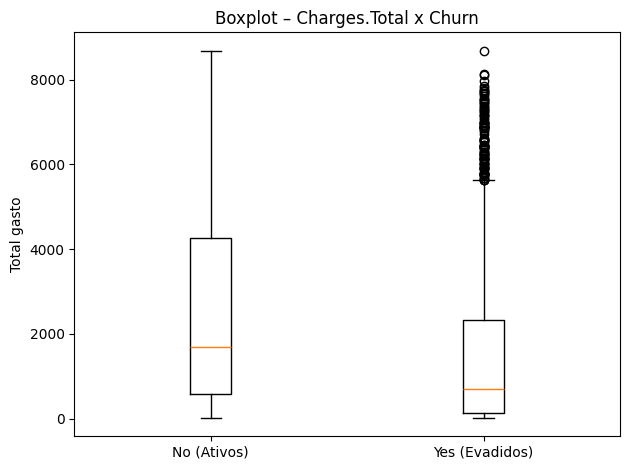

In [26]:
if "Charges.Total" in num_df.columns:
    plt.figure()
    data_total = [num_df.loc[y==0, "Charges.Total"].dropna(), num_df.loc[y==1, "Charges.Total"].dropna()]
    plt.boxplot(data_total, labels=["No (Ativos)", "Yes (Evadidos)"])
    plt.title("Boxplot – Charges.Total x Churn")
    plt.ylabel("Total gasto")
    plt.tight_layout()
    plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numeric and categorical columns based on the original X dataframe
categorical_cols = [c for c in X.columns if X[c].dtype=='object' or str(X[c].dtype)=='bool']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

# Modelo 1: Logistic Regression (com padronização para numéricas)
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore") # Removed sparse=False
preprocess_scaled = ColumnTransformer([("num", numeric_transformer, numeric_cols),
                                       ("cat", categorical_transformer, categorical_cols)],
                                      remainder="drop")
pipe_logreg = Pipeline(steps=[("preprocess", preprocess_scaled),
                             ("clf", LogisticRegression(max_iter=1000))])

# Modelo 2: RandomForest (sem padronização)
preprocess_tree = ColumnTransformer([("num","passthrough", numeric_cols),
                                     ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)], # Removed sparse=False
                                    remainder="drop")
pipe_rf = Pipeline(steps=[("preprocess", preprocess_tree),
                         ("clf", RandomForestClassifier(n_estimators=300, random_state=42))])

pipe_logreg.fit(X_train_raw, y_train)
pipe_rf.fit(X_train_raw, y_train)

def eval_model(name, pipe, Xtr, ytr, Xte, yte):
    import pandas as pd
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
    ytr_pred = pipe.predict(Xtr)
    yte_pred = pipe.predict(Xte)
    metrics = {
        "modelo": name,
        "acc_train": accuracy_score(ytr, ytr_pred),
        "acc_test": accuracy_score(yte, yte_pred),
        "precision_test": precision_score(yte, yte_pred, zero_division=0),
        "recall_test": recall_score(yte, yte_pred, zero_division=0),
        "f1_test": f1_score(yte, yte_pred, zero_division=0),
        "report_test": classification_report(yte, yte_pred, target_names=["Ativos (No)", "Evadidos (Yes)"]),
        "cm_test": confusion_matrix(yte, yte_pred)
    }
    return metrics

res_log = eval_model("LogisticRegression (com scaler)", pipe_logreg, X_train_raw, y_train, X_test_raw, y_test)
res_rf  = eval_model("RandomForest (sem scaler)",       pipe_rf,    X_train_raw, y_train, X_test_raw, y_test)

import pandas as pd
summary = pd.DataFrame([
    {"Modelo": res_log["modelo"], "Acc_Treino": res_log["acc_train"], "Acc_Teste": res_log["acc_test"],
     "Precisão_Teste": res_log["precision_test"], "Recall_Teste": res_log["recall_test"], "F1_Teste": res_log["f1_test"]},
    {"Modelo": res_rf["modelo"],  "Acc_Treino": res_rf["acc_train"],  "Acc_Teste": res_rf["acc_test"],
     "Precisão_Teste": res_rf["precision_test"],  "Recall_Teste": res_rf["recall_test"],  "F1_Teste": res_rf["f1_test"]},
])
summary

,Modelo,Acc_Treino,Acc_Teste,Precisão_Teste,Recall_Teste,F1_Teste
0,LogisticRegression (com scaler),0.808178,0.796731,0.645695,0.521390,0.576923
1,RandomForest (sem scaler),0.997689,0.793888,0.648936,0.489305,0.557927


===== Logistic Regression – Relatório (Teste) =====

                precision    recall  f1-score   support

   Ativos (No)       0.84      0.90      0.87      1033
Evadidos (Yes)       0.65      0.52      0.58       374

      accuracy                           0.80      1407
     macro avg       0.74      0.71      0.72      1407
  weighted avg       0.79      0.80      0.79      1407

Matriz de Confusão (Teste):
 [[926 107]
 [179 195]] 



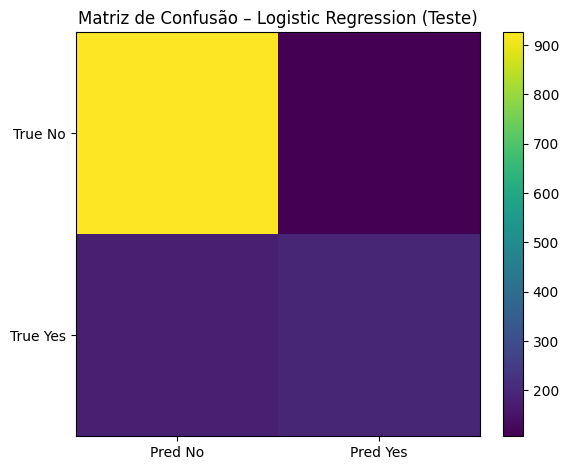

In [35]:
print("===== Logistic Regression – Relatório (Teste) =====\n")
print(res_log["report_test"])
print("Matriz de Confusão (Teste):\n", res_log["cm_test"], "\n")


plt.figure()
plt.imshow(res_log["cm_test"], interpolation='nearest')
plt.title("Matriz de Confusão – Logistic Regression (Teste)")
plt.xticks([0,1], ["Pred No", "Pred Yes"])
plt.yticks([0,1], ["True No", "True Yes"])
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

===== Random Forest – Relatório (Teste) =====

                precision    recall  f1-score   support

   Ativos (No)       0.83      0.90      0.87      1033
Evadidos (Yes)       0.65      0.49      0.56       374

      accuracy                           0.79      1407
     macro avg       0.74      0.70      0.71      1407
  weighted avg       0.78      0.79      0.78      1407

Matriz de Confusão (Teste):
 [[934  99]
 [191 183]] 



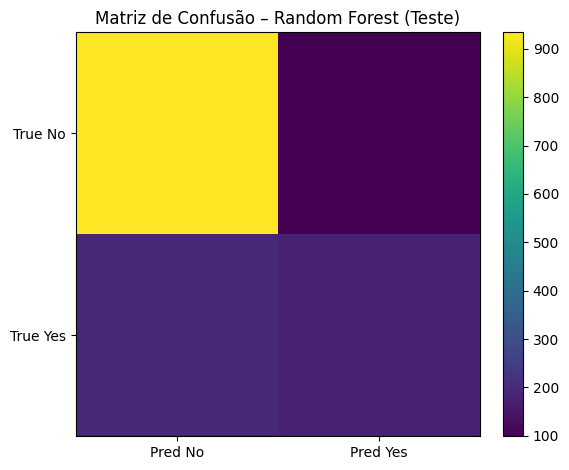

In [31]:
print("===== Random Forest – Relatório (Teste) =====\n")
print(res_rf["report_test"])
print("Matriz de Confusão (Teste):\n", res_rf["cm_test"], "\n")

plt.figure()
plt.imshow(res_rf["cm_test"], interpolation='nearest')
plt.title("Matriz de Confusão – Random Forest (Teste)")
plt.xticks([0,1], ["Pred No", "Pred Yes"])
plt.yticks([0,1], ["True No", "True Yes"])
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [38]:
# Variáveis relevantes para Churn: LogReg, KNN, RandomForest, SVM + consenso e relatório
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance

In [44]:
# Tipagem
categorical_cols = [c for c in X.columns if X[c].dtype == "object" or str(X[c].dtype) == "bool"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

In [46]:
# Transformer: escala numéricas, aplica One-Hot nas categóricas
ct = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ],
    remainder="drop"
)

In [47]:
# Ajustar/transformar
ct.fit(X_train_raw)
X_train = ct.transform(X_train_raw)
X_test  = ct.transform(X_test_raw)

In [59]:
# Nomes finais das features
try:
    feature_names = ct.get_feature_names_out().tolist()
except Exception:
    fn_num = [f"num__{c}" for c in numeric_cols]
    ohe = ct.named_transformers_["cat"]
    fn_cat = list(ohe.get_feature_names_out(categorical_cols))
    feature_names = fn_num + fn_cat

def evaluate(model_name, y_true, y_pred):
    return {
        "Modelo": model_name,
        "Acurácia": accuracy_score(y_true, y_pred),
        "Precisão": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "Matriz_Confusão": confusion_matrix(y_true, y_pred)
    }

def plot_bar(series, title):
    plt.figure()
    plt.bar(range(len(series.index)), series.values)
    plt.xticks(range(len(series.index)), series.index, rotation=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()


Top 20 |coef| – Regressão Logística:
 num__tenure                                 -1.312244
cat__Contract_Two year                      -1.284176
cat__InternetService_Fiber optic             0.880644
cat__Contract_One year                      -0.702695
num__Charges.Total                           0.602991
cat__TechSupport_Yes                        -0.416199
cat__PhoneService_Yes                       -0.409737
num__Charges.Monthly                        -0.373535
cat__PaperlessBilling_Yes                    0.369023
cat__PaymentMethod_Electronic check          0.355385
cat__OnlineSecurity_Yes                     -0.344785
cat__StreamingTV_Yes                         0.326206
cat__SeniorCitizen_True                      0.255921
cat__MultipleLines_Yes                       0.237808
num__Contas_Diarias                          0.201636
cat__StreamingMovies_Yes                     0.183711
cat__StreamingMovies_No internet service    -0.136396
cat__DeviceProtection_No internet service  

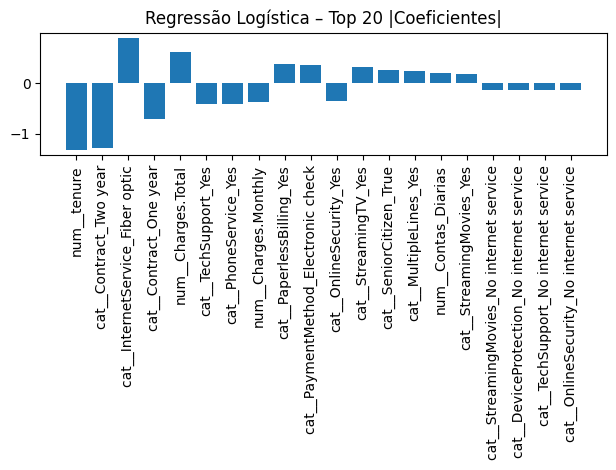

In [51]:
# 1) Regressão Logística – coeficientes (|coef|)
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

coef_log = pd.Series(logreg.coef_[0], index=feature_names)
coef_log_abs_sorted = coef_log.abs().sort_values(ascending=False)
top_log = coef_log.loc[coef_log_abs_sorted.head(20).index].sort_values(key=lambda s: s.abs(), ascending=False)

print("\nTop 20 |coef| – Regressão Logística:\n", top_log)
plot_bar(top_log, "Regressão Logística – Top 20 |Coeficientes|")
res_log = evaluate("Logistic Regression", y_test, y_pred_log)


Top 20 importâncias (Permutation/F1) – KNN:
 num__tenure                                   0.079476
num__Charges.Total                            0.029239
cat__OnlineBackup_Yes                         0.016508
num__Charges.Monthly                          0.013103
cat__PaperlessBilling_Yes                     0.011492
cat__OnlineSecurity_Yes                       0.008499
cat__TechSupport_Yes                          0.007387
cat__InternetService_Fiber optic              0.006689
num__Contas_Diarias                           0.002263
cat__Contract_One year                        0.001173
cat__MultipleLines_Yes                        0.000495
cat__PaymentMethod_Credit card (automatic)   -0.000364
cat__SeniorCitizen_True                      -0.001306
cat__Contract_Two year                       -0.001492
cat__PhoneService_Yes                        -0.002088
cat__MultipleLines_No phone service          -0.002088
cat__StreamingMovies_No internet service     -0.002686
cat__TechSupport_No

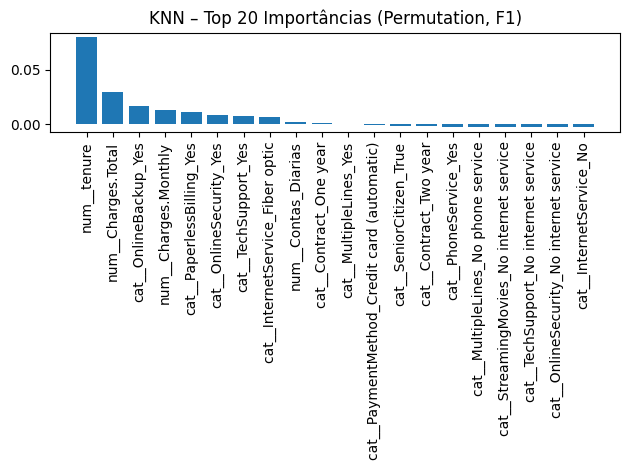

In [53]:
# 2) KNN – importância por Permutation Importance
#     (método agnóstico ao modelo; mede queda no F1)
knn = KNeighborsClassifier(n_neighbors=15, weights="distance")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# n_repeats pode ser ajustado (5 ou 10); maior = mais estável (e mais lento)
pi_knn = permutation_importance(knn, X_test, y_test, n_repeats=5, random_state=42, scoring="f1")
imp_knn = pd.Series(pi_knn.importances_mean, index=feature_names).sort_values(ascending=False)
top_knn = imp_knn.head(20)
print("\nTop 20 importâncias (Permutation/F1) – KNN:\n", top_knn)
plot_bar(top_knn, "KNN – Top 20 Importâncias (Permutation, F1)")
res_knn = evaluate("KNN (k=15, distance)", y_test, y_pred_knn)


Top 20 importâncias (Gini) – Random Forest:
 num__Charges.Total                     0.168217
num__tenure                            0.150758
num__Charges.Monthly                   0.137065
num__Contas_Diarias                    0.123936
cat__PaymentMethod_Electronic check    0.040078
cat__InternetService_Fiber optic       0.035478
cat__Contract_Two year                 0.028600
cat__gender_Male                       0.024922
cat__PaperlessBilling_Yes              0.023671
cat__OnlineSecurity_Yes                0.022982
cat__TechSupport_Yes                   0.021945
cat__Contract_One year                 0.021305
cat__Partner_Yes                       0.020119
cat__SeniorCitizen_True                0.019197
cat__OnlineBackup_Yes                  0.018704
cat__Dependents_Yes                    0.017860
cat__MultipleLines_Yes                 0.016846
cat__DeviceProtection_Yes              0.016285
cat__StreamingTV_Yes                   0.014494
cat__StreamingMovies_Yes               0.0

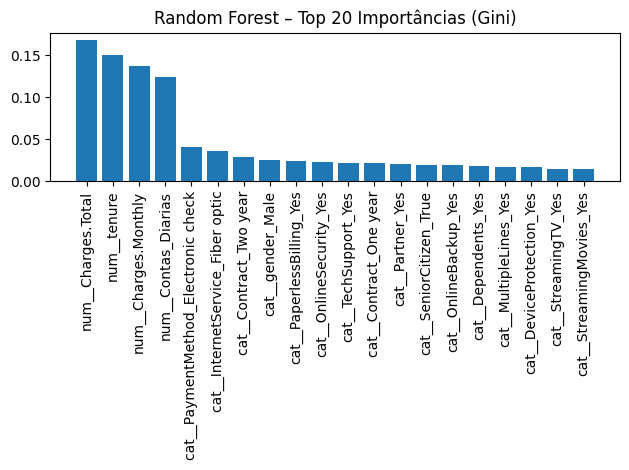

In [54]:

# 3) Random Forest – feature_importances_ (Gini)
rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

imp_rf = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
top_rf = imp_rf.head(20)
print("\nTop 20 importâncias (Gini) – Random Forest:\n", top_rf)
plot_bar(top_rf, "Random Forest – Top 20 Importâncias (Gini)")
res_rf = evaluate("Random Forest", y_test, y_pred_rf)


Top 20 |coef| – SVM Linear:
 cat__InternetService_Fiber optic             0.539970
num__Charges.Monthly                        -0.376637
cat__MultipleLines_No phone service         -0.296585
num__tenure                                 -0.269184
cat__PhoneService_Yes                       -0.261157
cat__Contract_One year                      -0.204512
cat__Contract_Two year                      -0.202548
cat__StreamingTV_Yes                         0.196511
cat__PaymentMethod_Electronic check          0.149164
num__Contas_Diarias                          0.146488
cat__StreamingMovies_Yes                     0.145527
cat__MultipleLines_Yes                       0.132981
cat__PaperlessBilling_Yes                    0.126781
cat__TechSupport_Yes                        -0.110934
cat__SeniorCitizen_True                      0.109736
cat__OnlineSecurity_Yes                     -0.079369
cat__StreamingMovies_No internet service    -0.067716
cat__DeviceProtection_No internet service   -0.06771

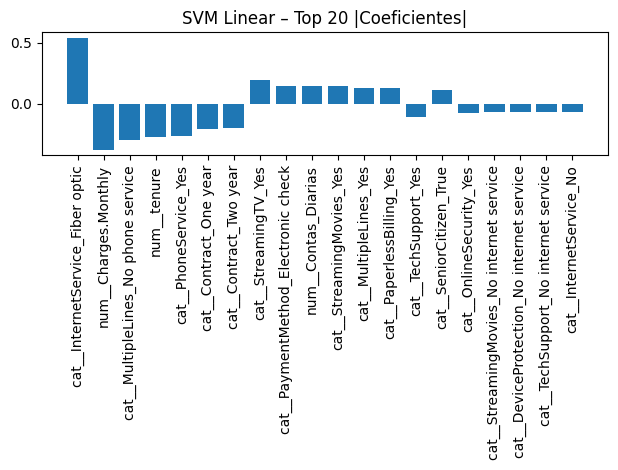

In [55]:
# 4) SVM Linear – coeficientes (|coef| da LinearSVC)
svm = LinearSVC(max_iter=6000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

coef_svm = pd.Series(svm.coef_[0], index=feature_names)
coef_svm_abs_sorted = coef_svm.abs().sort_values(ascending=False)
top_svm = coef_svm.loc[coef_svm_abs_sorted.head(20).index].sort_values(key=lambda s: s.abs(), ascending=False)

print("\nTop 20 |coef| – SVM Linear:\n", top_svm)
plot_bar(top_svm, "SVM Linear – Top 20 |Coeficientes|")
res_svm = evaluate("Linear SVM", y_test, y_pred_svm)

In [56]:
# 5) Comparação de desempenho
summary = pd.DataFrame([res_log, res_knn, res_rf, res_svm])[["Modelo","Acurácia","Precisão","Recall","F1"]]
print("\nDesempenho por modelo (teste):\n", summary)


Desempenho por modelo (teste):
                  Modelo  Acurácia  Precisão    Recall        F1
0   Logistic Regression  0.796731  0.645695  0.521390  0.576923
1  KNN (k=15, distance)  0.769012  0.570201  0.532086  0.550484
2         Random Forest  0.796020  0.654804  0.491979  0.561832
3            Linear SVM  0.796731  0.651724  0.505348  0.569277



Top 20 por consenso (rank médio):
                                        rank_medio  rank_log  rank_svm  \
num__tenure                                 2.000       1.0       4.0   
num__Charges.Monthly                        4.250       8.0       2.0   
cat__InternetService_Fiber optic            4.500       3.0       1.0   
cat__Contract_Two year                      7.500       2.0       7.0   
cat__Contract_One year                      8.000       4.0       6.0   
num__Charges.Total                          8.250       5.0      25.0   
cat__PaperlessBilling_Yes                   9.000       9.0      13.0   
cat__TechSupport_Yes                        9.500       6.0      14.0   
num__Contas_Diarias                         9.500      15.0      10.0   
cat__OnlineSecurity_Yes                    10.750      11.0      16.0   
cat__PaymentMethod_Electronic check        12.000      10.0       9.0   
cat__MultipleLines_Yes                     13.500      14.0      12.0   
cat__SeniorCiti

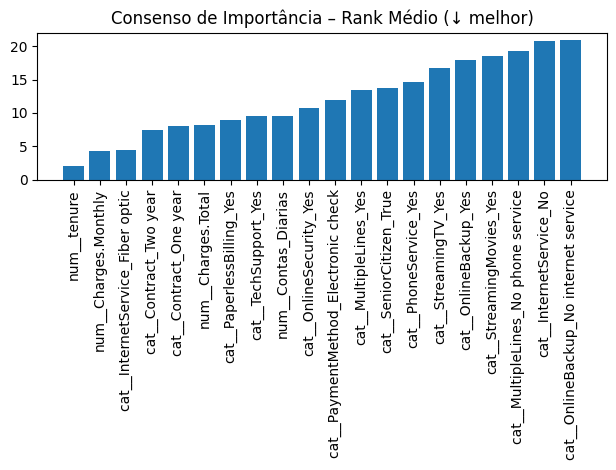

In [57]:
#6) Ranking de consenso entre os 4 métodos
#     (rank médio: menor = mais importante)
def rank_series(s: pd.Series, descending=True):
    return s.rank(ascending=not descending, method="average")

rank_log = rank_series(coef_log.abs())   # coeficientes absolutos
rank_svm = rank_series(coef_svm.abs())
rank_rf  = rank_series(imp_rf)           # já positivo
rank_knn = rank_series(imp_knn)          # já positivo

rank_df = pd.DataFrame({
    "rank_log": rank_log,
    "rank_svm": rank_svm,
    "rank_rf":  rank_rf,
    "rank_knn": rank_knn
}).dropna(how="all")

rank_df["rank_medio"] = rank_df.mean(axis=1)
rank_df = rank_df.sort_values("rank_medio")
top_consenso = rank_df.head(20)
print("\nTop 20 por consenso (rank médio):\n", top_consenso[["rank_medio","rank_log","rank_svm","rank_rf","rank_knn"]])

plt.figure()
plt.bar(range(len(top_consenso.index)), top_consenso["rank_medio"].values)
plt.xticks(range(len(top_consenso.index)), top_consenso.index, rotation=90)
plt.title("Consenso de Importância – Rank Médio (↓ melhor)")
plt.tight_layout()
plt.show()


In [58]:
# 7) Relatório textual (console) – conclusões e ações
def pretty_name(fname: str) -> str:
    return fname.replace("num__", "").replace("cat__", "")

def top_feature_text(series, k=10):
    idx = series.abs().sort_values(ascending=False).index[:k] if isinstance(series, pd.Series) else series.index[:k]
    return "\n".join([f"- {pretty_name(i)}" for i in idx])

print("\n" + "#"*70)
print("RELATÓRIO – VARIÁVEIS RELEVANTES E ESTRATÉGIAS\n")

print("Desempenho (teste):")
for row in summary.itertuples(index=False):
    print(f"- {row.Modelo}: Acc={row.Acurácia:.3f} | Prec={row.Precisão:.3f} | Rec={row.Recall:.3f} | F1={row.F1:.3f}")

print("\nPrincipais variáveis por método (Top 10):")
print("\nLogReg:\n" + top_feature_text(coef_log, 10))
print("\nKNN (Permutation):\n" + "\n".join([f"- {pretty_name(i)}" for i in imp_knn.index[:10]]))
print("\nRandomForest:\n" + "\n".join([f"- {pretty_name(i)}" for i in imp_rf.index[:10]]))
print("\nLinear SVM:\n" + top_feature_text(coef_svm, 10))

print("\nConsenso – Top 15:")
print("\n".join([f"- {pretty_name(i)}" for i in top_consenso.index[:15]]))

print("\nEstratégias sugeridas (direcionadas pelos fatores mais importantes):")
print("- Migrar **contratos mês a mês** para planos de maior permanência com incentivos (descontos, meses bônus).")
print("- Incentivar **pagamento automático** (substituir 'electronic check') com bônus/cashback para reduzir fricção.")
print("- Para **internet Fiber optic** (se aparecer como risco): revisar preço/valor e oferecer suporte técnico proativo.")
print("- Foco em **clientes novos** (tenure baixo): onboarding e check-ins nos primeiros 60–90 dias.")
print("- **Bundles** que aumentem percepção de valor (OnlineSecurity/TechSupport/Streaming) com teste gratuito.")
print("- Campanhas prescritivas para o decil de maior risco previsto (ofertas de retenção + acompanhamento de impacto).")
print("#"*70 + "\n")


######################################################################
RELATÓRIO – VARIÁVEIS RELEVANTES E ESTRATÉGIAS

Desempenho (teste):
- Logistic Regression: Acc=0.797 | Prec=0.646 | Rec=0.521 | F1=0.577
- KNN (k=15, distance): Acc=0.769 | Prec=0.570 | Rec=0.532 | F1=0.550
- Random Forest: Acc=0.796 | Prec=0.655 | Rec=0.492 | F1=0.562
- Linear SVM: Acc=0.797 | Prec=0.652 | Rec=0.505 | F1=0.569

Principais variáveis por método (Top 10):

LogReg:
- tenure
- Contract_Two year
- InternetService_Fiber optic
- Contract_One year
- Charges.Total
- TechSupport_Yes
- PhoneService_Yes
- Charges.Monthly
- PaperlessBilling_Yes
- PaymentMethod_Electronic check

KNN (Permutation):
- tenure
- Charges.Total
- OnlineBackup_Yes
- Charges.Monthly
- PaperlessBilling_Yes
- OnlineSecurity_Yes
- TechSupport_Yes
- InternetService_Fiber optic
- Contas_Diarias
- Contract_One year

RandomForest:
- Charges.Total
- tenure
- Charges.Monthly
- Contas_Diarias
- PaymentMethod_Electronic check
- InternetService_Fib